Assignment 11:

Business Problem: Optimizing Battery Rental Pricing with Driver Segmentation


Background: Lithionpower, the leading electric vehicle (e-vehicle) battery provider, operates on a rental model for its batteries. The company faces challenges in determining optimal rental pricing for e-vehicle drivers. The battery's lifespan is influenced by various factors such as over speeding and the distance driven per day.


Objective: Develop a cluster model that groups drivers based on their driving data, allowing Lithionpower to optimize its battery rental pricing strategy. The goal is to identify patterns in driving behavior to create targeted pricing plans, ensuring fair and competitive rates for drivers while maximizing the company's profitability.


Data Fields:
id: Unique identifier for each driver.
mean_dist_day: Mean distance driven by the driver per day.
mean_over_speed_perc: Mean percentage of time a driver exceeded 5 mph over the speed limit.
Gender: Gender of the driver.


Approach:
Cluster Analysis: Utilize machine learning clustering algorithms to group drivers with similar driving behavior.

Segmentation Criteria:
Drivers in the same cluster exhibit similar driving patterns.
Clusters can be formed based on mean distance driven and mean over speeding percentage.


Benefits:

Customized Pricing: Tailor rental pricing plans based on cluster characteristics.

Resource Optimization: Efficiently manage battery replacements and charging stations based on cluster demands.

Customer Satisfaction: Offer fair and competitive pricing, enhancing customer satisfaction and loyalty.

Outcome:
Optimized Pricing Plans: Differentiated pricing plans for each cluster to reflect the impact of driving behavior on battery life.

Improved Operational Efficiency: Streamlined battery replacement and charging logistics based on cluster demands.

Enhanced Profitability: Maximizing revenue by aligning pricing with driving patterns while ensuring customer satisfaction.

Key Performance Indicators (KPIs):

Cluster Homogeneity: Measure the similarity of driving patterns within clusters.

Customer Satisfaction Index: Monitor customer feedback and satisfaction with the new pricing plans.

Revenue Growth: Track the impact of optimized pricing on overall revenue.
By leveraging machine learning clustering techniques, Lithionpower aims to enhance its business model, providing a win-win solution for both the company and its e-vehicle driver customers.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
file_path =('/content/drive/MyDrive/driverdata.csv')
df = pd.read_csv(file_path)
df

,Unnamed: 0,id,mean_dist_day,mean_over_speed_perc,Gender
0,0,3423311935,71.24,28,Female
1,1,3423313212,52.53,25,Female
2,2,3423313724,64.54,27,Male
3,3,3423311373,55.69,22,Male
4,4,3423310999,54.58,25,Male
...,...,...,...,...,...
3995,3995,3423310685,160.04,10,Female
3996,3996,3423312600,176.17,5,Female
3997,3997,3423312921,170.91,12,Male
3998,3998,3423313630,176.14,5,Male


In [18]:
df.shape #4000 rows and 5 columns

(4000, 5)

In [19]:
df.columns
#Data Fields:
#id: Unique identifier for each driver.
#mean_dist_day: Mean distance driven by the driver per day.
#mean_over_speed_perc: Mean percentage of time a driver exceeded 5 mph over the speed limit.
#Gender: Gender of the driver.

Index(['Unnamed: 0', 'id', 'mean_dist_day', 'mean_over_speed_perc', 'Gender'], dtype='object')

In [20]:
df.isna().sum()

Unnamed: 0              0
id                      0
mean_dist_day           0
mean_over_speed_perc    0
Gender                  0
dtype: int64

In [21]:
#Drop the 'Unnamed: 0' column, cause it represent the sequence number
df = df.drop('Unnamed: 0', axis=1)

# Now, df does not contain the 'Unnamed: 0' column
print(df.head())

           id  mean_dist_day  mean_over_speed_perc  Gender
0  3423311935          71.24                    28  Female
1  3423313212          52.53                    25  Female
2  3423313724          64.54                    27    Male
3  3423311373          55.69                    22    Male
4  3423310999          54.58                    25    Male


In [22]:
unique_gender_values = df['Gender'].unique()
print("Unique values in 'Gender' column:", unique_gender_values)

Unique values in 'Gender' column: ['Female' 'Male']


#Data Visualization

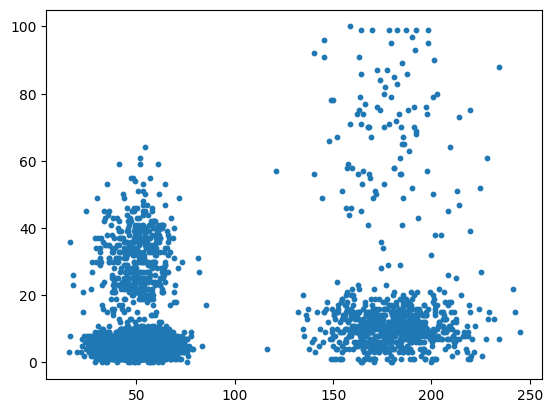

In [54]:
plt.scatter(df['mean_dist_day'],df['mean_over_speed_perc'],marker='o',s=10)
plt.show()

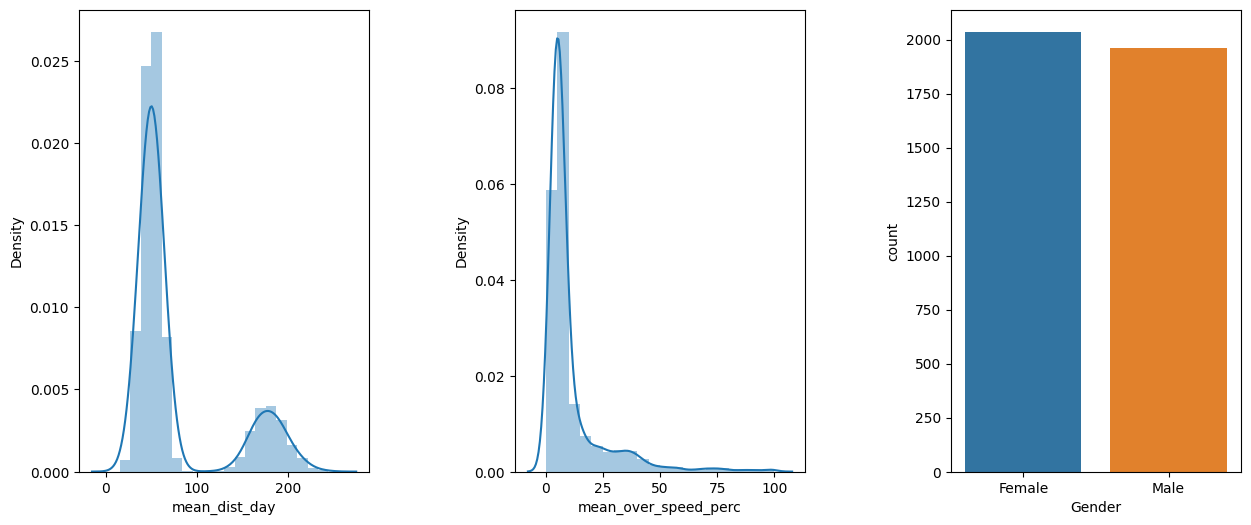

In [23]:
#Density estimation of values using distplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(15, 6))
feature_list = ['mean_dist_day', 'mean_over_speed_perc', 'Gender']
pos = 1

for i in feature_list:
    plt.subplot(1, 3, pos)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    if i == 'Gender':
        sns.countplot(data=df, x=i)
    else:
        sns.distplot(df[i], bins=20, kde=True)

    pos = pos + 1
plt.show()

Female    2037
Male      1963
Name: Gender, dtype: int64

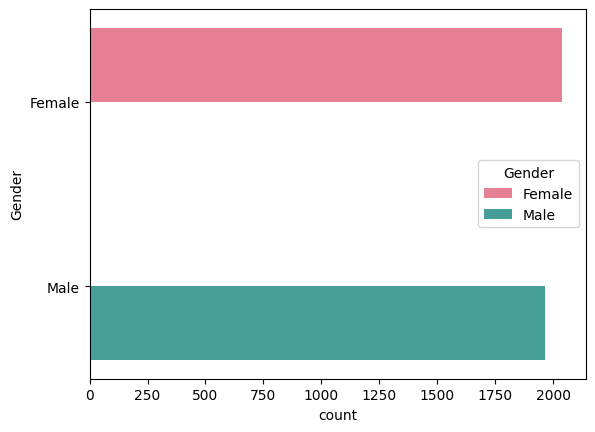

In [24]:
#Count and plot gender
sns.countplot(y = 'Gender', data = df, palette="husl", hue = "Gender")
df["Gender"].value_counts()

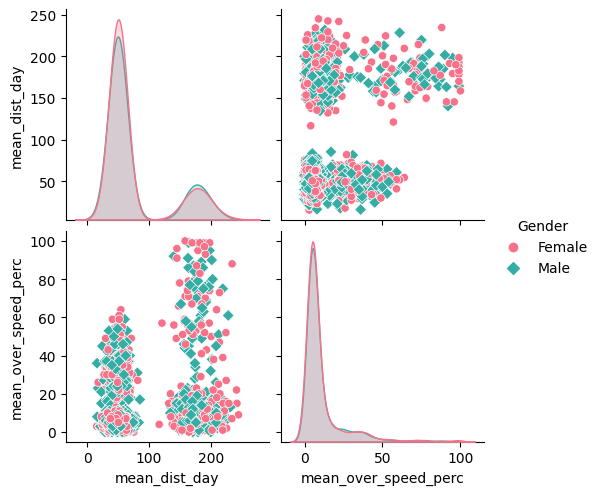

In [25]:
# Pairplot with variables we want to study
sns.pairplot(df, vars=['mean_dist_day', 'mean_over_speed_perc'], hue='Gender', palette='husl', markers=['o', 'D'])


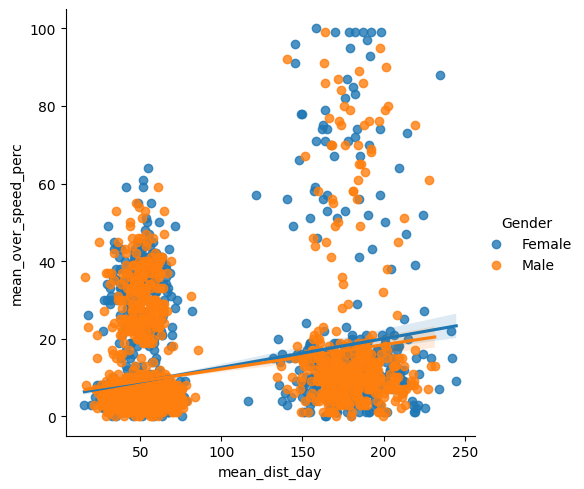

In [26]:
sns.lmplot(x="mean_dist_day", y="mean_over_speed_perc", data=df, hue="Gender")


In [27]:
# Data preprocessing

# Convert 'Gender' column to numerical values (e.g., Male: 0, Female: 1)

#when performing clustering or many other machine learning algorithms,
#it's often necessary to convert categorical variables like 'Gender' into numerical values.
#This process is known as encoding.


df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [28]:
# Select relevant features for clustering
features = ['mean_dist_day', 'mean_over_speed_perc', 'Gender']
X = df[features]
X

,mean_dist_day,mean_over_speed_perc,Gender
0,71.24,28,1
1,52.53,25,1
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0
...,...,...,...
3995,160.04,10,1
3996,176.17,5,1
3997,170.91,12,0
3998,176.14,5,0


In [29]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


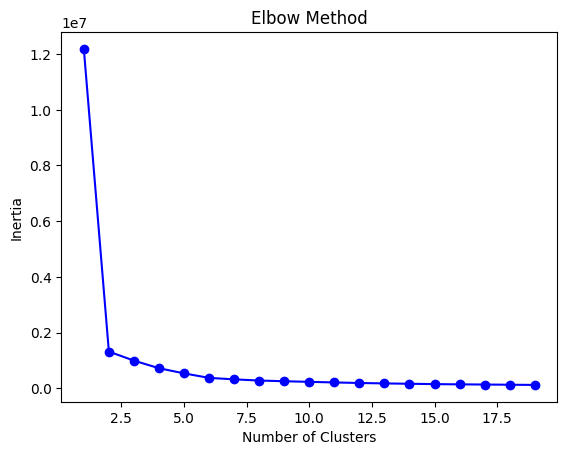

In [30]:
# Select relevant features for clustering
features = ['mean_dist_day', 'mean_over_speed_perc', 'Gender']
X = df[features]

# Creating values for the elbow
inertia = []
k = range(1, 20)
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow
plt.plot(k, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [41]:
#Training kmeans with 4 clusters
means_k = KMeans(n_clusters=4, random_state=0)
means_k.fit(X)
labels = means_k.labels_
centroids = means_k.cluster_centers_

In [42]:
df['Cluster'] = labels

# Group by cluster and calculate mean values for each feature
cluster_means = df.groupby('Cluster').mean()

# Print and analyze the cluster characteristics
print(cluster_means)


                   id  mean_dist_day  mean_over_speed_perc    Gender
Cluster                                                             
0        3.423312e+09      49.988006              5.209445  0.515862
1        3.423313e+09     177.835096             70.288462  0.538462
2        3.423312e+09      50.435915             32.396714  0.490610
3        3.423312e+09     180.343118             10.520115  0.489943


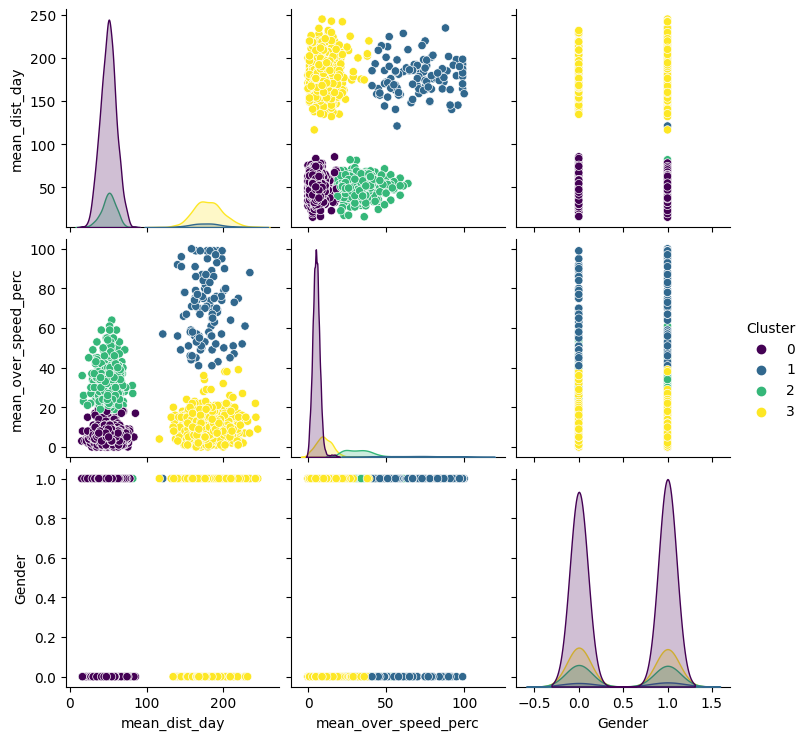

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize cluster characteristics using pair plots
sns.pairplot(df, hue='Cluster', vars=['mean_dist_day', 'mean_over_speed_perc', 'Gender'], palette='viridis')
plt.show()

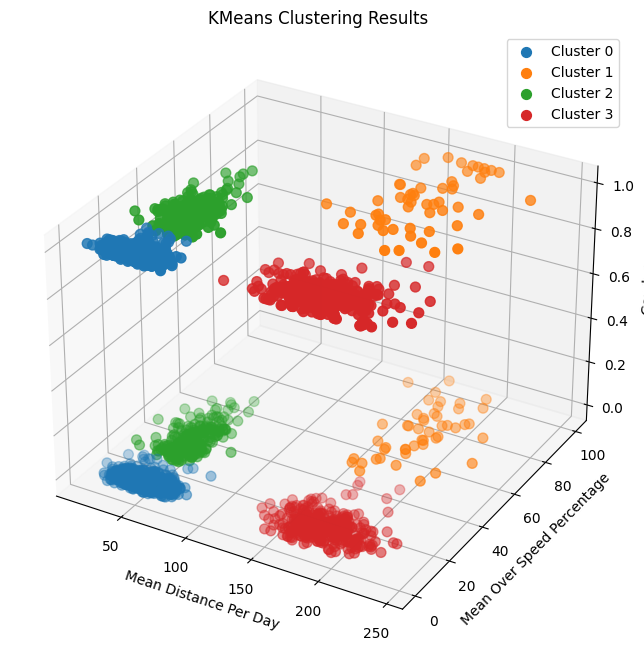

In [67]:
#Method 1 for 3D scatter plot (can't drag and move)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have cluster labels in the DataFrame df
df['Cluster'] = labels

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster in range(4):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(
        cluster_data['mean_dist_day'],
        cluster_data['mean_over_speed_perc'],
        cluster_data['Gender'],
        label=f'Cluster {cluster}',
        s=50  # Adjust the size of points as needed
    )

# Set labels and title
ax.set_xlabel('Mean Distance Per Day')
ax.set_ylabel('Mean Over Speed Percentage')
ax.set_zlabel('Gender')
ax.set_title('KMeans Clustering Results')



# Add a legend
ax.legend()

plt.show()


In [70]:
#Method 2 : Scatter3d plot (can drag and move)
#This is the 3D example from Mall Customer Segmentation.ipynb

import plotly.graph_objs as go
import plotly.offline as py

# Assuming you have cluster labels in the 'labels' array
unique_labels = set(labels)

# Create a legend mapping cluster number to color
legend_data = [{'label': f'Cluster {label}', 'color': color} for label, color in zip(unique_labels, px.colors.qualitative.Set1)]

# Create a list of traces for each cluster
traces = []
for label in unique_labels:
    cluster_data = X[labels == label]
    trace = go.Scatter3d(
        x=cluster_data['mean_dist_day'],
        y=cluster_data['mean_over_speed_perc'],
        z=cluster_data['Gender'],
        mode='markers',
        marker=dict(
            color=label,
            size=15,
            opacity=0.9
        ),
        name=f'Cluster {label}'
    )
    traces.append(trace)

# Create the layout
layout = go.Layout(
    title='3D Clusters',
    scene=dict(
        xaxis=dict(title='mean_dist_day'),
        yaxis=dict(title='mean_over_speed_perc'),
        zaxis=dict(title='Gender')
    ),
    legend=dict(itemsizing='constant', itemwidth=100),
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Add the legend to the layout
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[
                dict(label='All',
                     method='relayout',
                     args=['visible', [True] * len(traces)]),
            ],
        ),
    ],
)


# Display the plot
py.iplot(fig)


In [63]:
df['Cluster'] = labels

# Group by 'Cluster' and 'Gender' and calculate counts
cluster_gender_counts = df.groupby(['Cluster', 'Gender']).size().unstack().fillna(0)

# Calculate percentage for each cluster
cluster_gender_percentage = cluster_gender_counts.div(cluster_gender_counts.sum(axis=1), axis=0) * 100

# Display the result
print("Percentage of Male and Female in Each Cluster:")
print(cluster_gender_percentage)


Percentage of Male and Female in Each Cluster:
Gender           0          1
Cluster                      
0        48.413843  51.586157
1        46.153846  53.846154
2        50.938967  49.061033
3        51.005747  48.994253


* x- axis='mean_dist_day' , Mean distance driven by the driver per day.
* y- axis='mean_over_speed_perc'
* z-axis='Gender', 0 is Male, 1 is Female


1. Cluster 0, Blue Color, low Mean Distance per Day, low Mean Over Speed Percentage, male = 48.4%, female = 51.6%

2. Cluster 1, Orange Color, high Mean Distance per Day, high Mean Over Speed Percentage, male = 46.2%, female = 53.8%

3. Cluster 2, Green Color, low Mean Distance per Day, moderate Mean Over Speed Percentage, male = 51%, female = 49%

4. Cluster 3, Purple Color, high Mean Distance per Day, low Mean Over Speed Percentage, male = 51%, female = 49%

In [90]:
import plotly.graph_objs as go
import plotly.offline as pyo

cluster_counts = df['Cluster'].value_counts()

# Calculate percentage for each cluster
cluster_percentage = (cluster_counts / len(df)) * 100

# Create a Pie chart
pie_chart = go.Figure(data=[go.Pie(labels=cluster_percentage.index, values=cluster_percentage)])

# Update layout for better visualization
pie_chart.update_layout(title_text="Percentage of Data Points in Each Cluster")

# Display the pie chart
pyo.iplot(pie_chart)


I doubt the pie chart % , so to verify that I will run another KMeans cluster without 'Gender' in the 2D diagram instead of the 3D diagram.

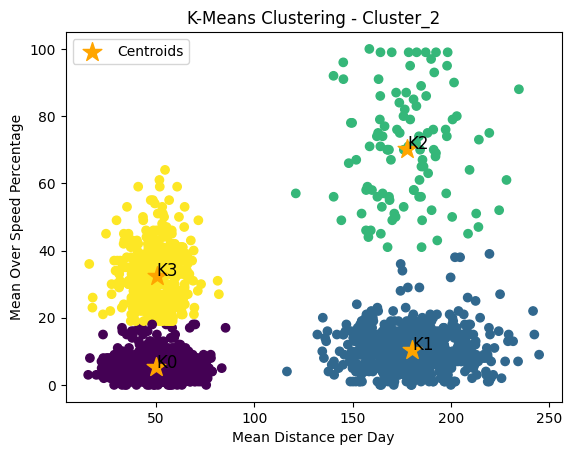

In [91]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Your existing code for clustering
features = ['mean_dist_day', 'mean_over_speed_perc']
X_cluster_2 = df[features]

kmeans_cluster_2 = KMeans(n_clusters=4, random_state=0)
labels_cluster_2 = kmeans_cluster_2.fit_predict(X_cluster_2)

df['Cluster_2'] = labels_cluster_2

# Scatter plot with cluster points
plt.scatter(X_cluster_2['mean_dist_day'], X_cluster_2['mean_over_speed_perc'], c=labels_cluster_2, cmap='viridis')

# Scatter plot with centroids marked as 'K'
centroids = kmeans_cluster_2.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='orange', label='Centroids')

# Annotate centroids with cluster numbers
for i, label in enumerate(centroids):
    plt.text(centroids[i, 0], centroids[i, 1], f'K{i}', fontsize=12, color='black')

plt.title('K-Means Clustering - Cluster_2')
plt.xlabel('Mean Distance per Day')
plt.ylabel('Mean Over Speed Percentage')
plt.legend()
plt.show()


In [88]:
#calculate % to see if same as my pie chart

cluster_2_counts = df['Cluster_2'].value_counts()

cluster_2_percentage = cluster_2_counts / len(df) * 100

print("Percentage of Each Cluster_2:")
print(cluster_2_percentage)

#Verified is same as my pie chart

Percentage of Each Cluster_2:
0    69.325
1    17.400
3    10.675
2     2.600
Name: Cluster_2, dtype: float64


In [92]:
from sklearn.cluster import KMeans

features = ['mean_dist_day', 'mean_over_speed_perc']
X_cluster_2 = df[features]

kmeans_cluster_2 = KMeans(n_clusters=4, random_state=0)
labels_cluster_2 = kmeans_cluster_2.fit_predict(X_cluster_2)

df['Cluster_2'] = labels_cluster_2

# Get the centroid values
centroids = kmeans_cluster_2.cluster_centers_

# Print the centroid values for each cluster
for i, centroid in enumerate(centroids):
    print(f'Centroid K{i}: {centroid}')

#These centroids of these K-mean_clusters_2 provide a succinct summary of their driving characteristics

Centroid K0: [49.99263253  5.20447169]
Centroid K1: [180.34311782  10.52011494]
Centroid K2: [177.83509615  70.28846154]
Centroid K3: [50.40482436 32.36533958]


**[K-mean Cluster_2 - Without Gender]**

1. Cluster 0 , low Mean Distance per Day, low Mean Over Speed Percentage , 69.33%

2. Cluster 1 , high Mean Distance per Day, low Mean Over Speed Percentage, 17.4%

3. Cluster 2 , high Mean Distance per Day, mid to high Mean Over Speed Percentage , 2.6%

4. Cluster 3,low Mean Distance per Day, mid Mean Over Speed Percentage, 10.68%

# **Conclusion**

In summary, KMeans Cluster (with gender)  effectively segments drivers, enabling targeted marketing for optimized battery rental pricing. **Gender differences in driving behavior are minimal.**

In **K-means Cluster 2** , four distinct subgroups are identified:

* Cluster 0, characterized by low mean distance and low mean over-speed percentage, constitutes the majority at 69.33%.

* Cluster 1, with high mean distance and low mean over-speed percentage, represents 17.4%.

* Cluster 2, featuring high mean distance and mid to high mean over-speed percentage, is a smaller group at 2.6%. Lastly,

:* Cluster 3, with low mean distance and mid mean over-speed percentage, accounts for 10.68%.

This segmentation enables Lithionpower to tailor battery rental pricing plans, ensuring fair rates, efficient resource allocation, and maximizing profitability.

The results provide a strategic framework for differentiated pricing and operational efficiency, aligning with the company's objective of optimizing battery rental pricing through driver segmentation.

If we could have additional variables such as 'Driver's Age' or 'Year of Vehicle' could further enhance prediction and analysis accuracy.
